<a href="https://colab.research.google.com/github/DenVankov/Hakaton/blob/master/Hakaton2(Den).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

from openpyxl import load_workbook

In [104]:
data_pit = pd.read_excel('./xlsx/Закупки по теме питания.xlsx', sheet_name=1, header = 1)
data_pit.head()


,Заказчик,ИНН,Стоимость (руб.),Реестровый номер,Сфера деятельности,Наименование публикации,Unnamed: 6,Unnamed: 7,Unnamed: 8,Поставщик,ИНН.1,Победитель,Стоимость (руб.).1,"Снижение на торгах,%"
0,МБОУ СОШ № 6 С УГЛУБЛЕННЫМ ИЗУЧЕНИЕМ ОТДЕЛЬНЫХ...,5.021011e+09,580050.0,902555,[ОКПД2 56.29] Услуги по обеспечению питанием п...,Оказание услуг по организации питания для учащ...,Московская область,Подольск,2019-10-17 19:04:06,NaN,NaN,NaN,NaN,NaN
1,"ФГБУ ""РОСДЕТЦЕНТР""",7.703411e+09,11500000.0,0173100003519000163,[ОКПД2 82.30] Услуги по организации конференци...,Оказание комплекса услуг по размещению участни...,Москва,Москва,2019-10-17 19:29:51,NaN,NaN,NaN,NaN,NaN
2,ОМВД РОССИИ ПО ЛАХДЕНПОХСКОМУ РАЙОНУ,1.012012e+09,560000.0,0106100004719000007,[ОКПД2 56.29] Услуги по обеспечению питанием п...,Оказание услуг по организации ежедневного (вкл...,Республика Карелия,Республика Карелия,2019-10-17 17:28:06,NaN,NaN,NaN,NaN,NaN
3,"КГБУЗ ""ЦРБ Г. ЗМЕИНОГОРСКА""",2.206001e+09,230637.0,0817200000319012538,[ОКПД2 17.23] Принадлежности канцелярские бума...,Поставка бланочной продукции в 2020 году для н...,Алтайский край,Змеиногорский район,2019-10-17 13:14:00,NaN,NaN,NaN,NaN,NaN
4,"МУ ""ЦГЗСР Г. ТУЛЫ""",7.106031e+09,1131010.0,0166300024719000934,[ОКПД2 56.21] Услуги по поставке продукции общ...,Оказание услуг по питанию спасателей,Тульская область,Тула,2019-10-17 17:57:00,NaN,NaN,NaN,NaN,NaN


In [0]:
wb = openpyxl.load_workbook('./xlsx/Закупки по теме питания.xlsx')
ws = wb.get_sheet_by_name('Результаты поиска')
print(ws.cell(row=2, column=6).hyperlink)

# wbFile = openpyxl.load_workbook(filename = './xlsx/Закупки по теме питания.xlsx',data_only=True)
# wsFile = wbFile['Результаты поиска']
# print(wsFile) 

None


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  


In [0]:
# Load in the workbook
wb = load_workbook('./xlsx/Закупки по теме питания.xlsx')

# # Get sheet names
# print(wb.get_sheet_names())
# sheet = wb.get_sheet_by_name('Результаты поиска')
# tmp = 'F7'
# hyp = sheet[tmp].value
# print(hyp)
# parts = hyp.rsplit("\"")
# res = parts[1]
# print(res)


def get_links(name):
  sheet = wb.get_sheet_by_name(name)
  maximum_row  = sheet.max_row
  hyper_links  = [''] *(maximum_row)
  name_publics = [''] *(maximum_row)
  strings =     [''] *(maximum_row)
  column = 'F'
  
  for i in range(3, maximum_row):
    tmp = column + str(i) 
    strings[i] = sheet[tmp].value
    parts = strings[i].rsplit('\"')
    res = parts[1]
    
    hyper_links[i] = res
    name_publics[i]= parts[3]

  data = pd.DataFrame({'Description': name_publics[3:], 'Hyperlinks': hyper_links[3:]})  
  
#  return name_publicks,hyper_links
  return data

#name_publicks,hyper_links = get_links('Результаты поиска')
data = get_links('Результаты поиска')
data.head()


# for i in range(2, 10):
#   print(name_publics[i],hyper_links[i])
  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  from ipykernel import kernelapp as app


,Description,Hyperlinks
0,Оказание услуг по организации питания для учащ...,https://www.spark-marketing.ru/Card/Lot/74410334
1,Оказание комплекса услуг по размещению участни...,https://www.spark-marketing.ru/Card/Lot/74417341
2,Оказание услуг по организации ежедневного (вкл...,https://www.spark-marketing.ru/Card/Lot/74413711
3,Поставка бланочной продукции в 2020 году для н...,https://www.spark-marketing.ru/Card/Lot/74406420
4,Оказание услуг по питанию спасателей,https://www.spark-marketing.ru/Card/Lot/74414761


In [0]:
data.groupby('Description').count()

,Hyperlinks
Description,
"(000)Товары, работы или услуги на сумму, не превышающую 100 тыс. руб. (п.4 ч.1 ст.93 Федерального закона №44-ФЗ)",11
"(000)Товары, работы или услуги на сумму, не превышающую 300 тыс. руб. (п. 4 ч. 1 ст. 93 Федерального закона № 44-ФЗ)",1
"(000)Товары, работы или услуги на сумму, не превышающую 400 тыс. рублей (п.5 ч.1 ст.93 Федерального закона №44-ФЗ)",29
"(000)Товары, работы или услуги на сумму, не превышающую 600 тыс. рублей (п. 5 ч. 1 ст. 93 Федерального закона № 44-ФЗ)",1
"(244)Товары, работы или услуги на сумму, не превышающие 100 тыс. руб. (п.4 ч.1 ст.93 44-ФЗ)",10
"(244)Товары, работы или услуги на сумму, не превышающую 100 тыс. руб. (п.4 ч.1 ст.93 Федерального закона №44-ФЗ)",3
(№ 863-эзк) запрос котировок в электронной форме на право заключить контракт на оказание услуг по предоставлению готового питания (комплексного обеда) для больных отделения дневных стационаров ОГБУЗ «Смоленский областной психоневрологический клиничес...,1
-. Запрос информации (RFI): Оказание услуг по организации и обслуживания питания отдыхающих пансиона...,1
0001-2019-1906494 Оказание услуг выездного ресторанного обслуживания посвященному 80-летию ОКБ Сухого,1


In [0]:
idx = data.Description == '(000)Товары, работы или услуги на сумму, не превышающую 100 тыс. руб. (п.4 ч.1 ст.93 Федерального закона №44-ФЗ)'
data[idx]

,Description,Hyperlinks
6821,"(000)Товары, работы или услуги на сумму, не пр...",https://www.spark-marketing.ru/Card/Lot/72865406
6823,"(000)Товары, работы или услуги на сумму, не пр...",https://www.spark-marketing.ru/Card/Lot/72865404
7001,"(000)Товары, работы или услуги на сумму, не пр...",https://www.spark-marketing.ru/Card/Lot/72826552
7002,"(000)Товары, работы или услуги на сумму, не пр...",https://www.spark-marketing.ru/Card/Lot/72824877
7275,"(000)Товары, работы или услуги на сумму, не пр...",https://www.spark-marketing.ru/Card/Lot/72802790
7279,"(000)Товары, работы или услуги на сумму, не пр...",https://www.spark-marketing.ru/Card/Lot/72798936
7761,"(000)Товары, работы или услуги на сумму, не пр...",https://www.spark-marketing.ru/Card/Lot/72744896
11371,"(000)Товары, работы или услуги на сумму, не пр...",https://www.spark-marketing.ru/Card/Lot/72265494
13974,"(000)Товары, работы или услуги на сумму, не пр...",https://www.spark-marketing.ru/Card/Lot/71940320
14394,"(000)Товары, работы или услуги на сумму, не пр...",https://www.spark-marketing.ru/Card/Lot/71840991


In [0]:
data_pit.head()

,Заказчик,ИНН,Стоимость (руб.),Реестровый номер,Сфера деятельности,Наименование публикации,Unnamed: 6,Unnamed: 7,Unnamed: 8,Поставщик,ИНН.1,Победитель,Стоимость (руб.).1,"Снижение на торгах,%"
0,МБОУ СОШ № 6 С УГЛУБЛЕННЫМ ИЗУЧЕНИЕМ ОТДЕЛЬНЫХ...,5.021011e+09,580050.0,902555,[ОКПД2 56.29] Услуги по обеспечению питанием п...,Оказание услуг по организации питания для учащ...,Московская область,Подольск,2019-10-17 19:04:06,NaN,NaN,NaN,NaN,NaN
1,"ФГБУ ""РОСДЕТЦЕНТР""",7.703411e+09,11500000.0,0173100003519000163,[ОКПД2 82.30] Услуги по организации конференци...,Оказание комплекса услуг по размещению участни...,Москва,Москва,2019-10-17 19:29:51,NaN,NaN,NaN,NaN,NaN
2,ОМВД РОССИИ ПО ЛАХДЕНПОХСКОМУ РАЙОНУ,1.012012e+09,560000.0,0106100004719000007,[ОКПД2 56.29] Услуги по обеспечению питанием п...,Оказание услуг по организации ежедневного (вкл...,Республика Карелия,Республика Карелия,2019-10-17 17:28:06,NaN,NaN,NaN,NaN,NaN
3,"КГБУЗ ""ЦРБ Г. ЗМЕИНОГОРСКА""",2.206001e+09,230637.0,0817200000319012538,[ОКПД2 17.23] Принадлежности канцелярские бума...,Поставка бланочной продукции в 2020 году для н...,Алтайский край,Змеиногорский район,2019-10-17 13:14:00,NaN,NaN,NaN,NaN,NaN
4,"МУ ""ЦГЗСР Г. ТУЛЫ""",7.106031e+09,1131010.0,0166300024719000934,[ОКПД2 56.21] Услуги по поставке продукции общ...,Оказание услуг по питанию спасателей,Тульская область,Тула,2019-10-17 17:57:00,NaN,NaN,NaN,NaN,NaN


(17214, 14)


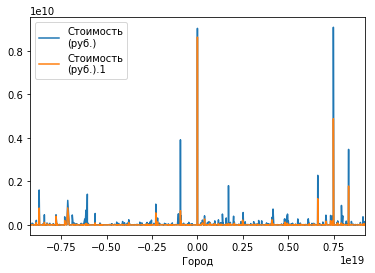

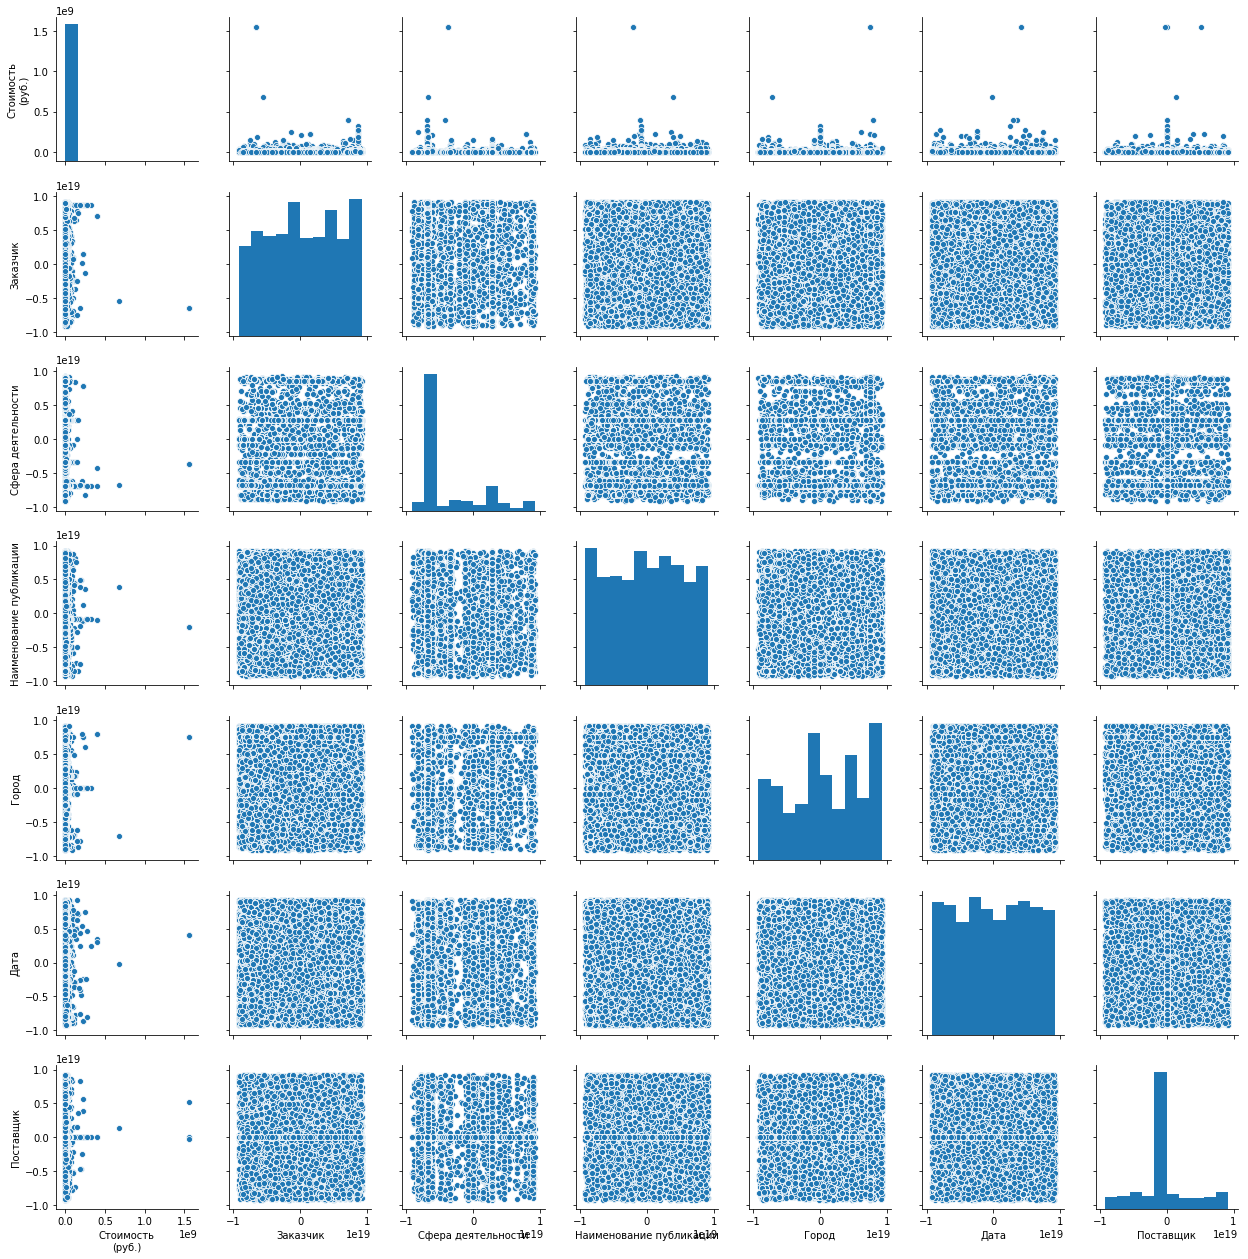

In [0]:
data_pit = data_pit.fillna(0)
data_pit['Заказчик'] = data_pit['Заказчик'].apply(hash)
data_pit['Сфера деятельности'] = data_pit['Сфера деятельности'].apply(hash)
data_pit['Наименование публикации'] = data_pit['Наименование публикации'].apply(hash)
data_pit['Unnamed: 7'] = data_pit['Unnamed: 7'].apply(hash)
data_pit['Unnamed: 8'] = data_pit['Unnamed: 8'].apply(hash)
data_pit['Поставщик']  =  data_pit['Поставщик'].apply(hash)

data_pit['Заказчик'] = data_pit.Заказчик.astype('float64')
data_pit['Сфера деятельности'] = data_pit['Сфера деятельности'].astype('float64')
data_pit['Наименование публикации'] = data_pit['Наименование публикации'].astype('float64')
data_pit['Unnamed: 7'] = data_pit['Unnamed: 7'].astype('float64')
data_pit['Unnamed: 8'] = data_pit['Unnamed: 8'].astype('float64')
data_pit['Поставщик']  =  data_pit['Поставщик'].astype('float64')

#print(data_pit.shape)

data_pit = data_pit.rename(columns = {'Unnamed: 7' : 'Город', 'Unnamed: 8' : 'Дата'})


useful_columns = ['Стоимость\n(руб.)', 'Заказчик', 'Сфера деятельности', 'Наименование публикации', 'Город', 'Дата', 'Поставщик']
data_pit[useful_columns].head()


sales_data = data_pit[[x for x in data_pit.columns if 'Стоимость\n(руб.)' in x] + ['Город']]
sales_data.groupby('Город').sum().plot()


#cols = ['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
sns_plot = sns.pairplot(data_pit[useful_columns])
sns_plot.savefig('pairplot.png')

# sales_df = df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']]
# sales_df.groupby('Year_of_Release').sum().plot()

#data_pit.applymap(hash)
#data_pit['Заказчик'] = data_pit.Заказчик.astype('float64')
# df['User_Score'] = df.User_Score.astype('float64')
# df['Year_of_Release'] = df.Year_of_Release.astype('int64')

In [103]:
data_pit.corr()

,Заказчик,ИНН,Стоимость (руб.),Сфера деятельности,Наименование публикации,Город,Дата,Поставщик,ИНН.1,Стоимость (руб.).1,"Снижение на торгах,%"
Заказчик,1.000000,-0.027805,0.010882,-0.008706,-0.026849,-0.028681,-0.011844,-0.001941,-0.012220,0.003768,-0.006714
ИНН,-0.027805,1.000000,0.019987,0.071417,-0.006767,-0.002850,-0.027850,0.036685,0.087390,-0.016619,0.015816
Стоимость\n(руб.),0.010882,0.019987,1.000000,-0.026252,-0.004137,0.026070,0.007022,0.019811,-0.023779,0.772832,0.000492
Сфера деятельности,-0.008706,0.071417,-0.026252,1.000000,-0.035067,-0.049433,0.027906,-0.025799,0.002618,-0.013840,-0.011630
Наименование публикации,-0.026849,-0.006767,-0.004137,-0.035067,1.000000,-0.017445,-0.011952,0.033867,-0.004941,-0.000951,0.001403
Город,-0.028681,-0.002850,0.026070,-0.049433,-0.017445,1.000000,0.014154,0.004599,-0.053529,0.015576,-0.006636
Дата,-0.011844,-0.027850,0.007022,0.027906,-0.011952,0.014154,1.000000,-0.010186,-0.009661,0.006711,0.008778
Поставщик,-0.001941,0.036685,0.019811,-0.025799,0.033867,0.004599,-0.010186,1.000000,0.008604,0.014275,0.001967
ИНН.1,-0.012220,0.087390,-0.023779,0.002618,-0.004941,-0.053529,-0.009661,0.008604,1.000000,-0.009091,0.020747
Стоимость\n(руб.).1,0.003768,-0.016619,0.772832,-0.013840,-0.000951,0.015576,0.006711,0.014275,-0.009091,1.000000,-0.046030
